**<u>Analyzing A Babynames Dataset In R With The dplyr Package</u>**

&nbsp;

Hi there. This page is about working with R's dplyr package for analyzing a babynames dataset. I have used the data.table package in R with this babynames dataset (Part 1 and Part 2) in the past but I have forgotten some things. Also, I am much more used to dplyr than data.table.

**<u>Sections</u>**

* Getting Started & The babynames Dataset
* Finding The Top 20 Baby Names
* Finding The Top 20 Female Baby Names
* Finding The Top 20 Male Baby Names
* Popular Baby Names By Letter
* References


**<u>Getting Started & The babynames Dataset</u>**

In R, we load the associated libraries.




In [1]:
# Analyzing Baby Names Dataset In R With dplyr
# With Sideways Bar Graphs
# Ref: https://stackoverflow.com/questions/27141565/how-to-sum-up-the-duplicated-value-while-keep-the-other-columns


library(babynames) # Baby Names dataset:
library(ggplot2) # For Data visualization & Graphs
library(dplyr) # For data wrangling and manipulation
library(stringr) # For strings and regex

Warning message:
"package 'babynames' was built under R version 3.4.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



The babynames package in R contains the babynames dataset where all the baby names are located.  (R Documentation image found below.)

The data is provided by the SSA. My guess of the SSA would be The United States Society Security Administration. Baby names from this data do not represent global baby names.

I save the babynames dataset into a variable called baby_data. Then I use the `head()`, `tail()` and `str()` functions to take a look of the data.

In [2]:
# Save the babynames data into baby_data:

baby_data <- data.frame(babynames)

# Preview the data:

head(baby_data); tail(baby_data)

year,sex,name,n,prop
1880,F,Mary,7065,0.07238433
1880,F,Anna,2604,0.02667923
1880,F,Emma,2003,0.02052170
1880,F,Elizabeth,1939,0.01986599
1880,F,Minnie,1746,0.01788861
1880,F,Margaret,1578,0.01616737


,year,sex,name,n,prop
1858684,2015,M,Zyah,5,2.466855e-06
1858685,2015,M,Zykell,5,2.466855e-06
1858686,2015,M,Zyking,5,2.466855e-06
1858687,2015,M,Zykir,5,2.466855e-06
1858688,2015,M,Zyrus,5,2.466855e-06
1858689,2015,M,Zyus,5,2.466855e-06


In [3]:
str(baby_data)

'data.frame':	1858689 obs. of  5 variables:
 $ year: num  1880 1880 1880 1880 1880 1880 1880 1880 1880 1880 ...
 $ sex : chr  "F" "F" "F" "F" ...
 $ name: chr  "Mary" "Anna" "Emma" "Elizabeth" ...
 $ n   : int  7065 2604 2003 1939 1746 1578 1472 1414 1320 1288 ...
 $ prop: num  0.0724 0.0267 0.0205 0.0199 0.0179 ...


In [4]:
# Change column names:

colnames(baby_data) <- c("Year", "Sex", "Name", "Count", "Proportion")

head(baby_data)

tail(baby_data)

Year,Sex,Name,Count,Proportion
1880,F,Mary,7065,0.07238433
1880,F,Anna,2604,0.02667923
1880,F,Emma,2003,0.02052170
1880,F,Elizabeth,1939,0.01986599
1880,F,Minnie,1746,0.01788861
1880,F,Margaret,1578,0.01616737


,Year,Sex,Name,Count,Proportion
1858684,2015,M,Zyah,5,2.466855e-06
1858685,2015,M,Zykell,5,2.466855e-06
1858686,2015,M,Zyking,5,2.466855e-06
1858687,2015,M,Zykir,5,2.466855e-06
1858688,2015,M,Zyrus,5,2.466855e-06
1858689,2015,M,Zyus,5,2.466855e-06


From the `head()` and `tail()` functions we can see that the babynames data contains names from the years 1880 to 2015. This is a lot of data and baby names! Remember though that these names are from the SSA are limited to the United States.

**Naming Considerations**

There are cases where certain names can be either Male or Female. Here are some examples:

&nbsp;

* Ashley is typically a female name but there are male Ashleys out there.
* Jordan is usually a guy's name but I have met a female Jordan.
* Lindsey is usually a female name but there are male Lindseys.
* Brett is usually a guy's name. It can also be a woman's name.

&nbsp;

I am not sure if names such as James, Jim and Jimmy are recorded together as one or are recorded separately. Other examples include Dave & David, Sara & Sarah, Ashley & Ashlee, Mary & Marie, Greg & Gregory, William & Will & Bill, John & Johnny & Jon and so on.

My guess is that there are not many of these cases in the data.

**<u>Finding The Top 20 Baby Names</u>**

The dplyr function in R comes in handy when it comes to data wrangling and manipulation. The data needs to be in a certain format that would be ready for plotting with ggplot2.

I create a variable called sorted_names which groups the names (from different years) and Sex together. Total counts for the names are provided as well. The arrange(desc(Total)) part rearranges the rows in the data from the highest counts to the lowest counts.

In [5]:
sorted_names <- baby_data %>% group_by(Name, Sex) %>% summarise(Total = sum(Count)) %>%
                     arrange(desc(Total))
sorted_names <- data.frame(sorted_names)

head(sorted_names, n = 20)

Name,Sex,Total
James,M,5120990
John,M,5095674
Robert,M,4803068
Michael,M,4323928
Mary,F,4118058
William,M,4071645
David,M,3589754
Joseph,M,2581785
Richard,M,2558165
Charles,M,2371621


The sorted names contains many rows but I just want the top twenty.

In [6]:
top_twenty_baby <- sorted_names[1:20, ]

top_twenty_baby

Name,Sex,Total
James,M,5120990
John,M,5095674
Robert,M,4803068
Michael,M,4323928
Mary,F,4118058
William,M,4071645
David,M,3589754
Joseph,M,2581785
Richard,M,2558165
Charles,M,2371621


The next lines of code is for making sure that the bars in the upcoming bar graphs are sorted in order (highest to lowest).

In [8]:
top_twenty_baby$Name <- factor(top_twenty_baby$Name, 
                        levels = top_twenty_baby$Name[order(top_twenty_baby$Total)]) 
 
top_twenty_baby$Sex <- as.factor(top_twenty_baby$Sex)

A bar graph within `ggplot2` can be created now. Here is the code and output.

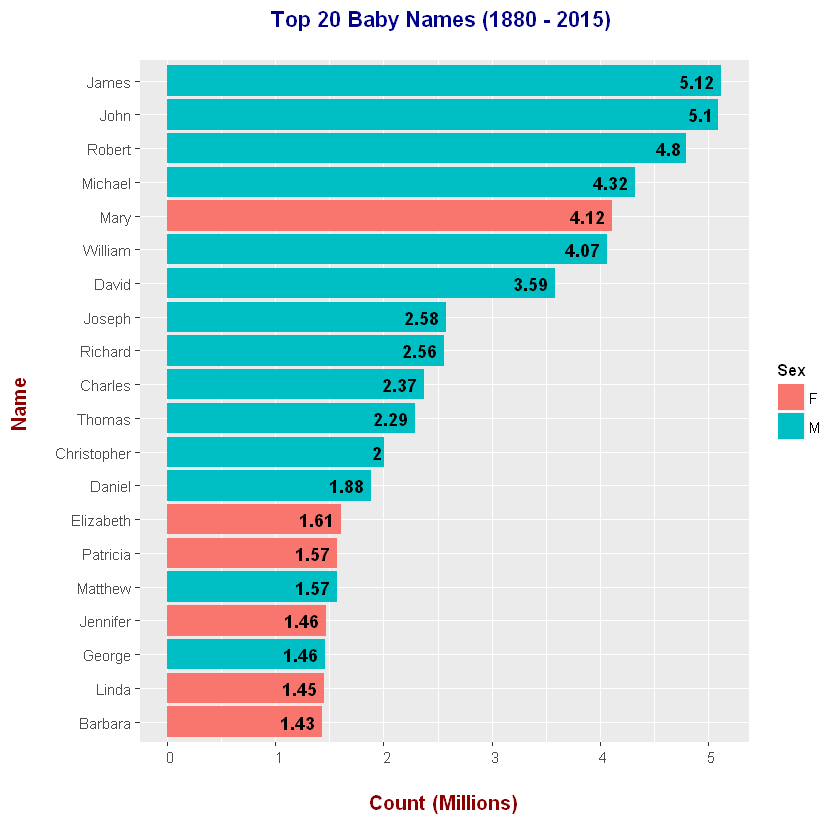

In [11]:
#Ggplot sideways bar graph:

ggplot(top_twenty_baby, aes(x = Name, y = Total/1000000, fill = Sex)) +
  geom_bar(stat = "identity") + coord_flip() +
  scale_y_continuous(breaks = seq(0, 6, 1)) +
  geom_text(aes(label = round(Total/1000000, 2)), hjust = 1.2, colour = "black", fontface = "bold") +
  labs(x = "Name \n", y = "\n Count (Millions) \n", title = "Top 20 Baby Names (1880 - 2015) \n") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", colour = "darkblue"),
       axis.title.x = element_text(face = "bold", colour = "darkred", size = 12, vjust = 1),
       axis.title.y = element_text(face = "bold", colour = "darkred", size = 12),
       axis.text.x = element_text(vjust = 0.1, hjust = 0.1),
       legend.title = element_text(face = "bold", size = 10))




**Some Notes**

* I put the counts in millions and have these counts displayed with the geom_text() add on function.
* coord_flip() converts the bar graph from vertical bars to horizontal bars.
* Setting fill = Sex gives the different colours for the graphs depending on gender. This is good for the viewer.
* The labs() and theme() functions are for dealing with the labels and title.
* There are more male names than female which are in the top 20 most popular baby names from 1880 to 2015 (in the USA).
* One could investigate even further why some on these names are so popular over time (historically).
* These names are from 1880 to 2015 but these names do not necessarily match the popular baby names from the year of 2016. Link: https://www.ssa.gov/oact/babynames/

These names are from 1880 to 2015 but these names do not necessarily match the popular baby names from the year of 2016. The image is from https://www.ssa.gov/oact/babynames/.

**<u>The Top 20 Female Baby Names<u>**


Finding the female baby names is not that difficult. We add in a `filter()` part into the `dplyr` code. The code is similar as the code in previous section.

In [12]:
## 2) Finding The Top 20 Female Baby Names:
 
female_names <- baby_data %>% filter(Sex == "F") %>% group_by(Name) %>% 
                  summarise(Total = sum(Count)) %>% arrange(desc(Total))

female_names <- data.frame(female_names)

head(female_names, n = 20)

top_twenty_female <- female_names[1:20, ]

top_twenty_female$Name <- factor(top_twenty_female$Name, 
                               levels = top_twenty_female$Name[order(top_twenty_female$Total)])

Name,Total
Mary,4118058
Elizabeth,1610948
Patricia,1570954
Jennifer,1464067
Linda,1451331
Barbara,1433339
Margaret,1242141
Susan,1120810
Dorothy,1106106
Sarah,1065265


From the data, it appears that Mary is the most popular baby name. Elizabeth takes second place and the name Patricia takes third place. As mentioned before, it is uncertain if Mary is grouped along with Marie, Maria, etc.

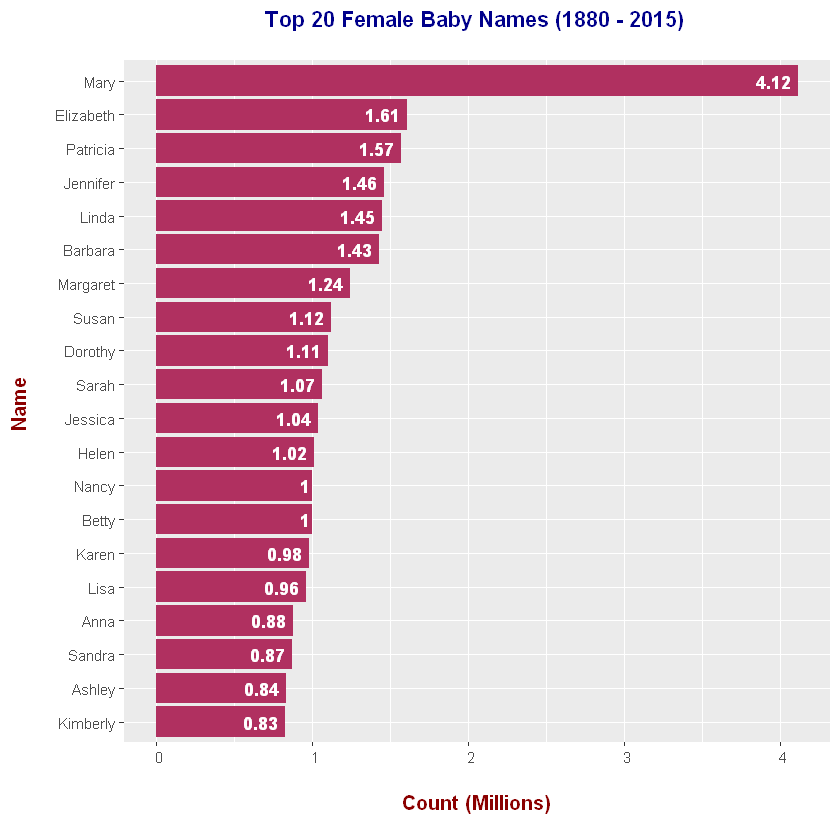

In [14]:
#Ggplot sideways bar graph:

ggplot(top_twenty_female, aes(x = Name, y = Total/1000000)) +
  geom_bar(stat = "identity", fill = "maroon") + coord_flip() +
  scale_y_continuous(breaks = seq(0, 6, 1)) +
  geom_text(aes(label = round(Total/1000000, 2)), hjust = 1.2, colour = "white", fontface = "bold") +
  labs(x = "Name \n", y = "\n Count (Millions) \n", title = "Top 20 Female Baby Names (1880 - 2015) \n") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", colour = "darkblue"),
       axis.title.x = element_text(face = "bold", colour = "darkred", size = 12, vjust = 1),
       axis.title.y = element_text(face = "bold", colour = "darkred", size = 12),
       axis.text.x = element_text(vjust = 0.1, hjust = 0.1),
       legend.title = element_text(face = "bold", size = 10))

Mary is the biggest winner from the data and from the bar graph. There must be something about the name Mary and its popularity which would require investigation. The name Elizabeth is in second. Like mentioned in the beginning, it is unknown if Liz, Liza or Beth would be counted as Elizabeth.

**<u>Finding The Top 20 Male Baby Names</u>**

Here are the top twenty male baby names in the form of a bar graph and its associated code.

In [16]:
## 3) Finding The Top 20 Male Baby Names:

male_names <- baby_data %>% filter(Sex == "M") %>% group_by(Name) %>% 
  summarise(Total = sum(Count)) %>% arrange(desc(Total))
male_names <- data.frame(male_names)

head(male_names, n = 20)

top_twenty_male <- male_names[1:20, ]

top_twenty_male$Name <- factor(top_twenty_male$Name, 
                        levels = top_twenty_male$Name[order(top_twenty_male$Total)]) 

Name,Total
James,5120990
John,5095674
Robert,4803068
Michael,4323928
William,4071645
David,3589754
Joseph,2581785
Richard,2558165
Charles,2371621
Thomas,2290364


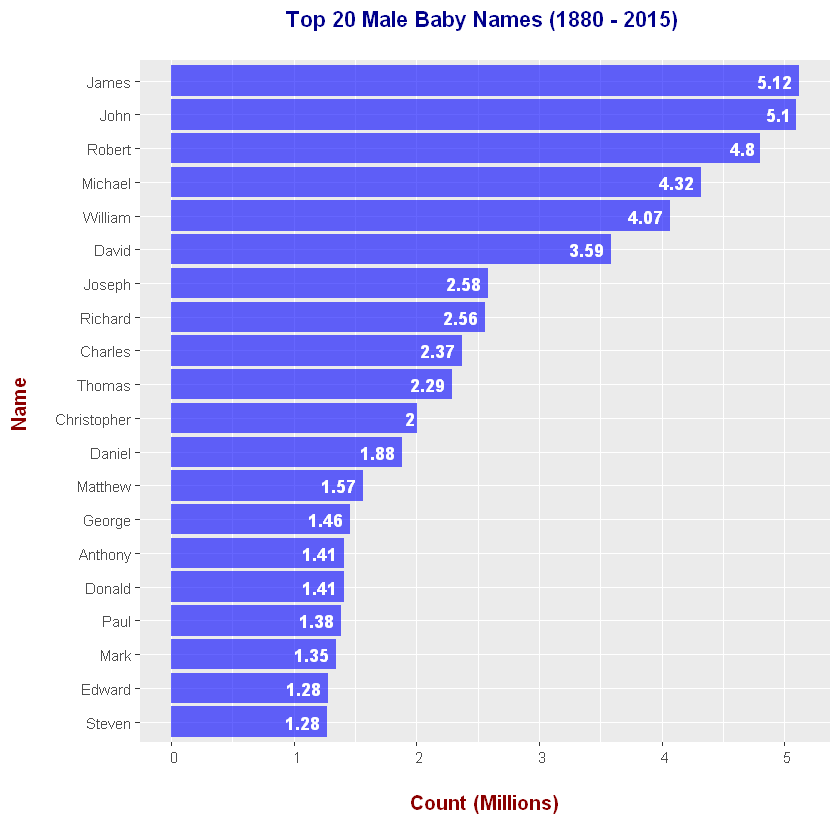

In [18]:
#Ggplot sideways bar graph:

ggplot(top_twenty_male, aes(x = Name, y = Total/1000000)) +
  geom_bar(stat = "identity", fill = "blue", alpha = 0.6) + coord_flip() +
  scale_y_continuous(breaks = seq(0, 6, 1)) +
  geom_text(aes(label = round(Total/1000000, 2)), hjust = 1.2, colour = "white", fontface = "bold") +
  labs(x = "Name \n", y = "\n Count (Millions) \n", title = "Top 20 Male Baby Names (1880 - 2015) \n") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", colour = "darkblue"),
       axis.title.x = element_text(face = "bold", colour = "darkred", size = 12, vjust = 1),
       axis.title.y = element_text(face = "bold", colour = "darkred", size = 12),
       axis.text.x = element_text(vjust = 0.1, hjust = 0.1),
       legend.title = element_text(face = "bold", size = 10))

**<u>Popular Baby Names By Letter</u>**

Some may find this metric useful and some may find it somewhat useless. I wanted to find the popular baby names by letter as an exercise in R. For me, this turned out to be somewhat technical.

**grepl() Function**

The `grepl()` function in R asks the user for a pattern (or regular expression) and for a string. If the pattern exists in the string, `grepl()` returns TRUE. If the pattern is not there a FALSE appears.

In [27]:
## 4) Popular Baby Names By Letter

# grepl Function:

grepl("^[Z]", "Zorro") # Is first letter a Z? True or False?

[1] TRUE

The `grepl()` function can be combined with the `filter()` function from the dplyr package. Here are some examples with the babynames dataset.

In [28]:
letterM <- baby_data %>% filter(grepl("^[M]", Name)) 

sum(letterM$Count)

letterA <- baby_data %>% filter(grepl("^[A]", Name)) 

sum(letterA$Count)

letterZ <- baby_data %>% filter(grepl("^[Z]", Name)) 

sum(letterZ$Count)

[1] 32272079

[1] 27836232

[1] 1396696

Obtaining the counts for each letter would require a loop instead of doing the above procedure 26 times. The LETTERS variable contains the 26 (captialized) letters and the loop will loop through these letters.

In [29]:
LETTERS

[1] "A" "B" "C" "D" "E" "F" "G" "H" "I" "J" "K" "L" "M" "N" "O" "P" "Q" "R" "S"
[20] "T" "U" "V" "W" "X" "Y" "Z"

In the for loop below I include the `paste0()` function with the `filter()` and `grepl()` functions. The `paste0()` function will combine the characters "^[", the element in LETTERS without the quotes, and "]". The counts for each letter are appended to a counts vector.

In [32]:
## Getting the counts by first letter in baby names with a for loop.

letterCounts <- c() #Empty vector

for (char in LETTERS) {
  total <- baby_data %>% filter(grepl(paste0("^[", noquote(char), "]"), Name))
  letterCounts <- append(letterCounts, sum(total$Count)) 
}


letterCounts_tbl <- data.frame("First_Letter" = LETTERS, "Count" = letterCounts)


letterCounts_tbl$First_Letter <- factor(letterCounts_tbl$First_Letter, 
                               levels = letterCounts_tbl$First_Letter[order(letterCounts_tbl$Count)]) 

top_fifteen_firstLetter <- letterCounts_tbl[1:15, ]

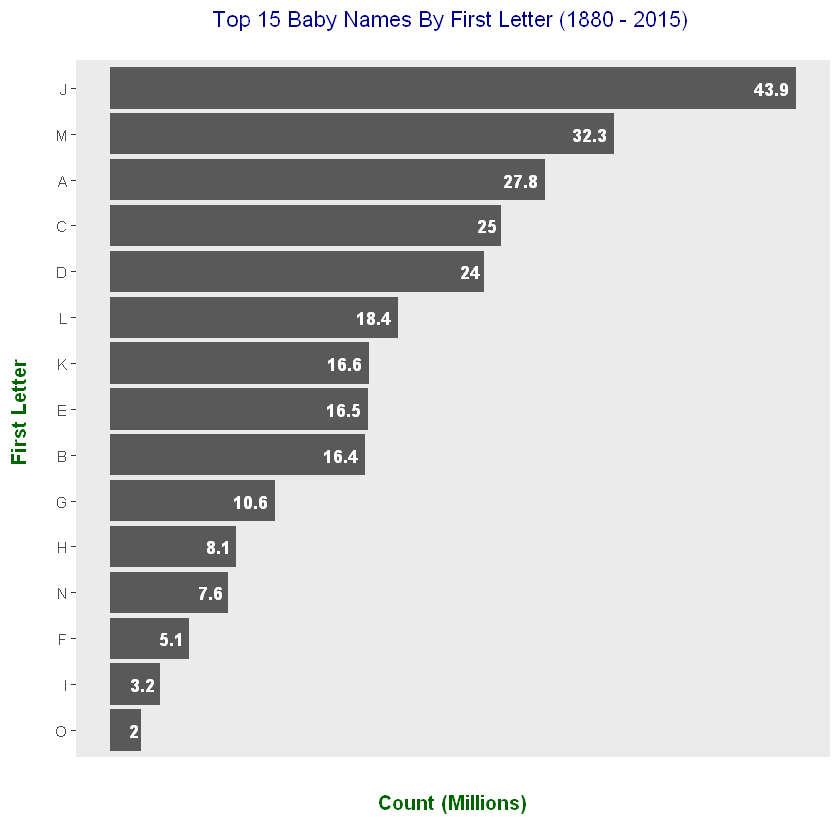

In [33]:
# Ggplot Sideways Bar Graph (With removed x axes):
# Ref: https://stackoverflow.com/questions/35090883/remove-all-of-x-axis-labels-in-ggplot
# http://felixfan.github.io/ggplot2-remove-grid-background-margin/

ggplot(top_fifteen_firstLetter , aes(x = First_Letter, y = Count/1000000)) + 
  geom_bar(stat = "identity") + coord_flip() +
  scale_y_continuous(breaks = seq(0, 6, 1)) + 
  geom_text(aes(label = round(Count/1000000, 1)), hjust = 1.2, colour = "white", fontface = "bold") +
  labs(x = "First Letter \n", y = "\n Count (Millions) \n", title = "Top 15 Baby Names By First Letter (1880 - 2015) \n") + 
  theme(plot.title = element_text(hjust = 0.5, colour = "darkblue"), 
        axis.title.x = element_text(face="bold", colour="darkgreen", size = 12, vjust = 1),
        axis.title.y = element_text(face="bold", colour="darkgreen", size = 12),
        axis.text.x = element_blank(),
        axis.ticks.x=element_blank(),
        panel.grid.minor = element_blank(),
        panel.grid.major = element_blank(),
        legend.title = element_text(face="bold", size = 10)) 

The letter J takes first place due to popular baby names such as John, James, Joseph, Jennifer and Jessica. The second place first letter goes to M. Notable names from the first letter M include Mary, Margaret, Michael and Matthew.

Note that I have removed some of the background lines in the plot with the use of commands such as panel.grid.minor = `element_blank()`  and `panel.grid.major = element_blank()`.

**<u>References</u>**

&nbsp;

* https://stackoverflow.com/questions/35090883/remove-all-of-x-axis-labels-in-ggplot
* http://felixfan.github.io/ggplot2-remove-grid-background-margin/
* https://stackoverflow.com/questions/27141565/how-to-sum-up-the-duplicated-value-while-keep-the-other-columns
* R Graphics Cookbook by Winston Chang